In [1]:
from collections import Counter
from wordcloud import WordCloud
from collections import Counter

import pandas as pd
import matplotlib.pyplot as plt
import nltk
import spacy

data = pd.read_json('data/data.json')
dataWIKIPEDIA = pd.read_json('data/wikipedia/wikipedia.json')
dataWIKIDaTA = pd.read_json('data/wikidata/wikidata.json')



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/opt/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/opt/anaconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/opt/anaconda3/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 701, in start
    self.io_loop.start()
  File "/opt/anaconda3/lib/python3.11/site-p

AttributeError: _ARRAY_API not found

ImportError: numpy.core.multiarray failed to import

In [ ]:
# Contar o número de valores em falta por feature

missing_values_per_index = data.isnull().sum(axis=1)
total_columns = data.shape[1]
missing_percentage_per_index = (missing_values_per_index / total_columns) * 100
missing_data_per_index = missing_values_per_index[missing_values_per_index > 0]
missing_data_per_index_sorted = missing_data_per_index.sort_values(ascending=False)

for index, missing_count in missing_data_per_index_sorted.items():
    percentage = missing_percentage_per_index[index]
    print(f'{index}: {missing_count} ({percentage:.2f}%)')


Risk Factors List: 3327 (98.99%)
Complications: 3327 (98.99%)
Can Cause: 3316 (98.66%)
Transmission Processes: 3295 (98.04%)
Risk factors: 3278 (97.53%)
Anatomical Location: 3263 (97.08%)
Different From: 3223 (95.89%)
Medical Exams: 3219 (95.78%)
Caused By: 3150 (93.72%)
Prevention: 3024 (89.97%)
Symptoms List: 3015 (89.71%)
Treatments List: 2874 (85.51%)
Genetic Associations: 2592 (77.12%)
Causes: 2523 (75.07%)
Symptoms: 1762 (52.42%)
Treatment: 1633 (48.59%)
Diagnosis: 1423 (42.34%)
Alias: 812 (24.16%)
Specialty: 720 (21.42%)


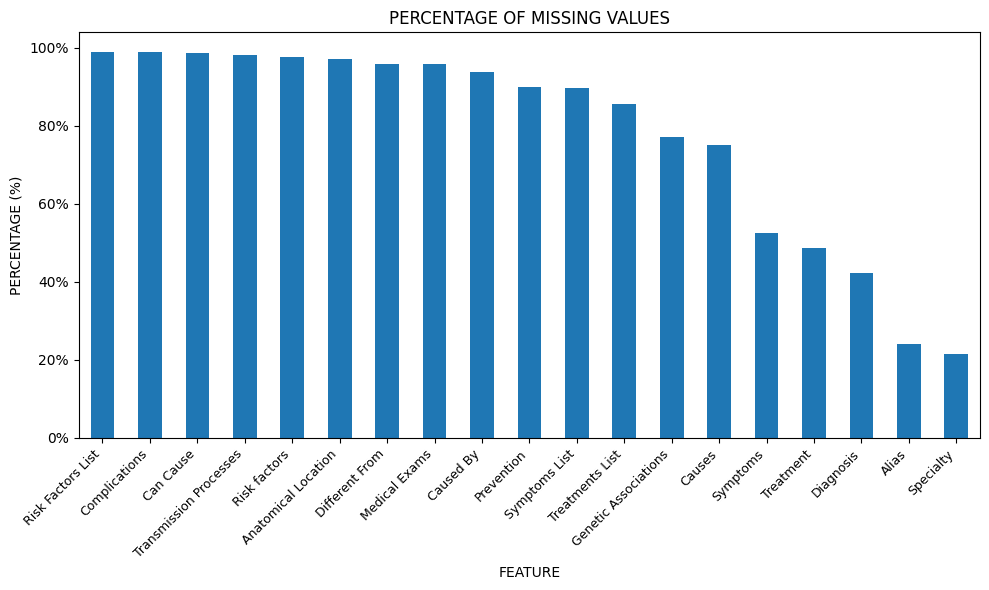

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

missing_values_per_index = data.isnull().sum(axis=1)
total_columns = data.shape[1]
missing_percentage_per_index = (missing_values_per_index / total_columns) * 100

missing_data_per_index = missing_percentage_per_index[missing_values_per_index > 0]
missing_data_per_index_sorted = missing_data_per_index.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
missing_data_per_index_sorted.plot(kind='bar')
plt.title('PERCENTAGE OF MISSING VALUES')
plt.xlabel('FEATURE')
plt.ylabel('PERCENTAGE (%)')

plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.0f}%'))

plt.xticks(rotation=45, ha='right', fontsize=9)

plt.tight_layout()
plt.show()


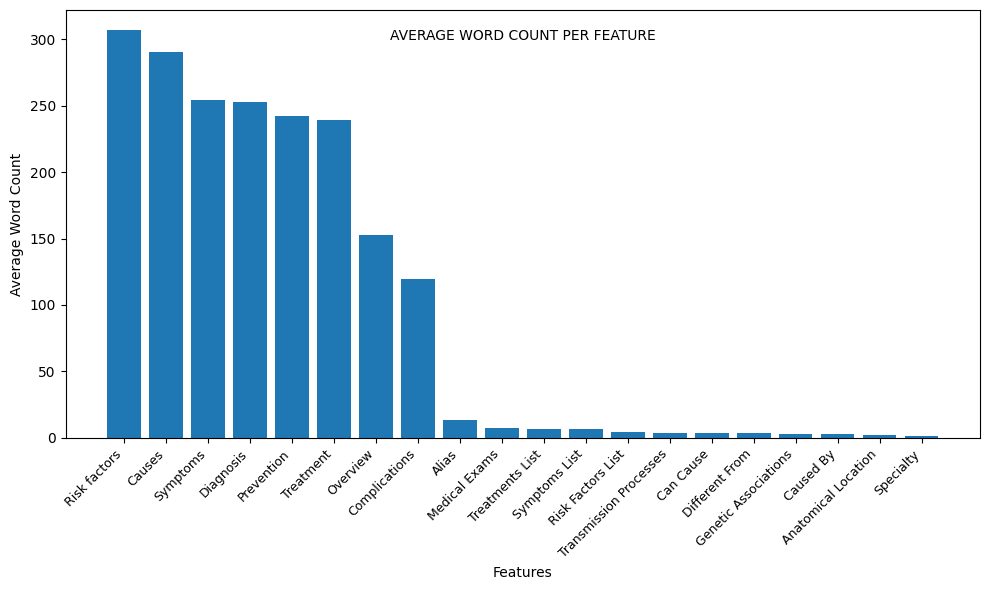

In [ ]:
# Número médio de palavras por feature

indices_to_exclude = ['Total Revisions', 'Last Revision Date']
data_string = data.drop(index=indices_to_exclude, errors='ignore')

def mean_word_count(entry):
    strings = entry.dropna().astype(str)
    word_counts = strings.apply(lambda x: len(x.split()))
    return word_counts.mean()

mean_word_count_per_entry = data_string.apply(mean_word_count, axis=1)
mean_word_count_per_entry = mean_word_count_per_entry[mean_word_count_per_entry.notna()]
if mean_word_count_per_entry.empty:
    print("There are no valid word counts in any entry.")
else:
    mean_word_count_per_entry = mean_word_count_per_entry.sort_values(ascending=False)
    plt.figure(figsize=(10, 6))
    bars = plt.bar(mean_word_count_per_entry.index, mean_word_count_per_entry)
    plt.title("AVERAGE WORD COUNT PER FEATURE", fontsize=10, y=0.91)
    plt.xlabel("Features", fontsize=10)
    plt.ylabel("Average Word Count", fontsize=10)
    plt.xticks(rotation=45, ha='right', fontsize=9)
    plt.tight_layout()
    plt.show()


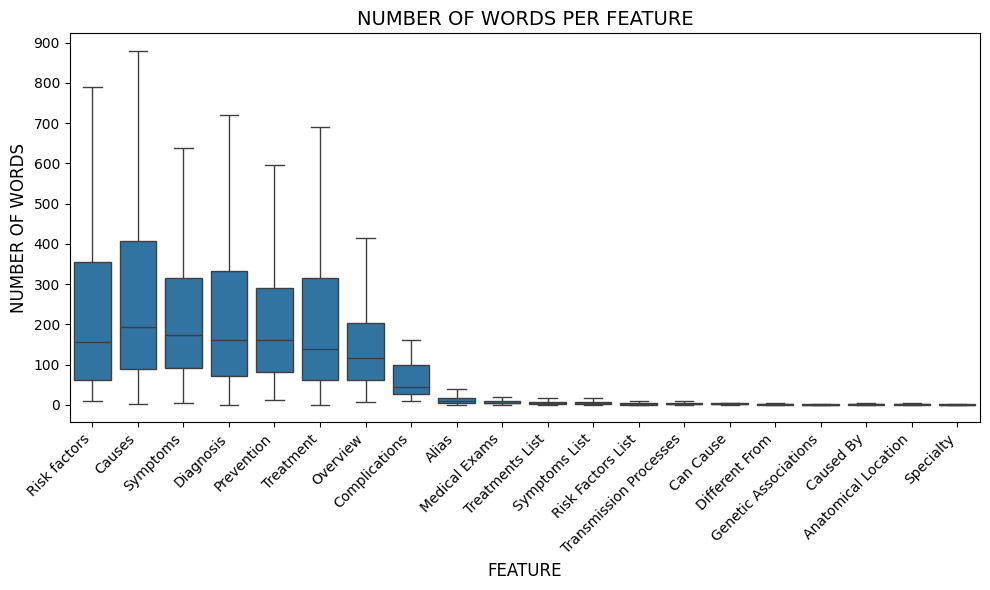

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator  # Para controlar os ticks no eixo Y

# Supondo que o seu DataFrame `data` já esteja definido e contém suas colunas
# Excluindo as linhas indesejadas
indices_to_exclude = ['Total Revisions', 'Last Revision Date']
data_string = data.drop(index=indices_to_exclude, errors='ignore')

# Função para contar palavras por linha
def count_words(row):
    return row.dropna().astype(str).apply(lambda x: len(x.split()))

# Criando um DataFrame para armazenar as contagens de palavras
word_counts_list = []

# Contar palavras para cada linha
for index, row in data_string.iterrows():
    word_counts = count_words(row)
    for feature, count in word_counts.items():
        word_counts_list.append({'Index': index, 'Feature': feature, 'Word Count': count})

# Criando um DataFrame com as contagens de palavras
word_counts_df = pd.DataFrame(word_counts_list)

# Calcular a média de contagem de palavras por índice
mean_word_counts = word_counts_df.groupby('Index')['Word Count'].mean().reset_index()
mean_word_counts = mean_word_counts.sort_values(by='Word Count', ascending=False)

# Criar uma lista ordenada de índices com base na média
ordered_indices = mean_word_counts['Index'].tolist()

# Criando o gráfico de caixa com os índices ordenados
plt.figure(figsize=(10, 6))
sns.boxplot(data=word_counts_df, x='Index', y='Word Count', showfliers=False, order=ordered_indices)  # Não mostrar outliers e usar a ordem definida
plt.title("NUMBER OF WORDS PER FEATURE", fontsize=14)
plt.xlabel("FEATURE", fontsize=12)
plt.ylabel("NUMBER OF WORDS", fontsize=12)

# Ajustar os ticks do eixo Y
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True, prune='both'))  # Ajusta ticks para valores inteiros

# Ajustar os ticks do eixo X
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotação de 45 graus e ajuste do tamanho da fonte

plt.tight_layout()
plt.show()


Through this graph it is possible to see that there are a large number of diseases whose Wikipedia page has already had several changes. With this information, we can predict that these diseases with the most reviews will be the most common, and the most frequently researched.

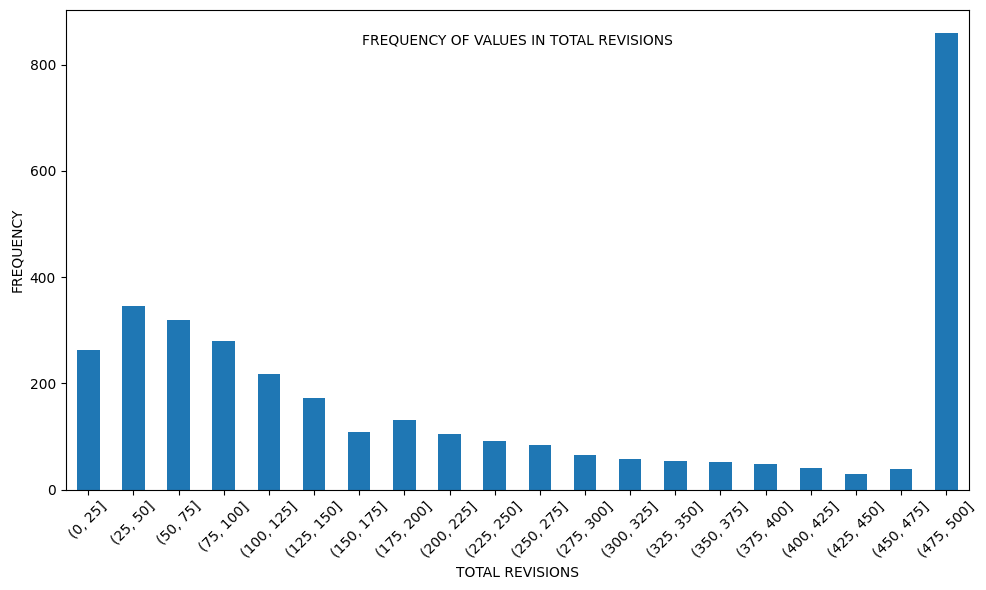

In [ ]:

# frequencia de valores em revisões torais (por intervalos)

if "Total Revisions" in data.index:
    total_revisions = data.loc["Total Revisions"]
    bins = range(0, int(total_revisions.max()) + 25, 25)
    binned_revisions = pd.cut(total_revisions, bins=bins)
    value_counts = binned_revisions.value_counts().sort_index()
    plt.figure(figsize=(10, 6))
    value_counts.plot(kind='bar')
    plt.title("FREQUENCY OF VALUES IN TOTAL REVISIONS",fontsize=10, y=0.91)
    plt.xlabel("TOTAL REVISIONS")
    plt.ylabel("FREQUENCY")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

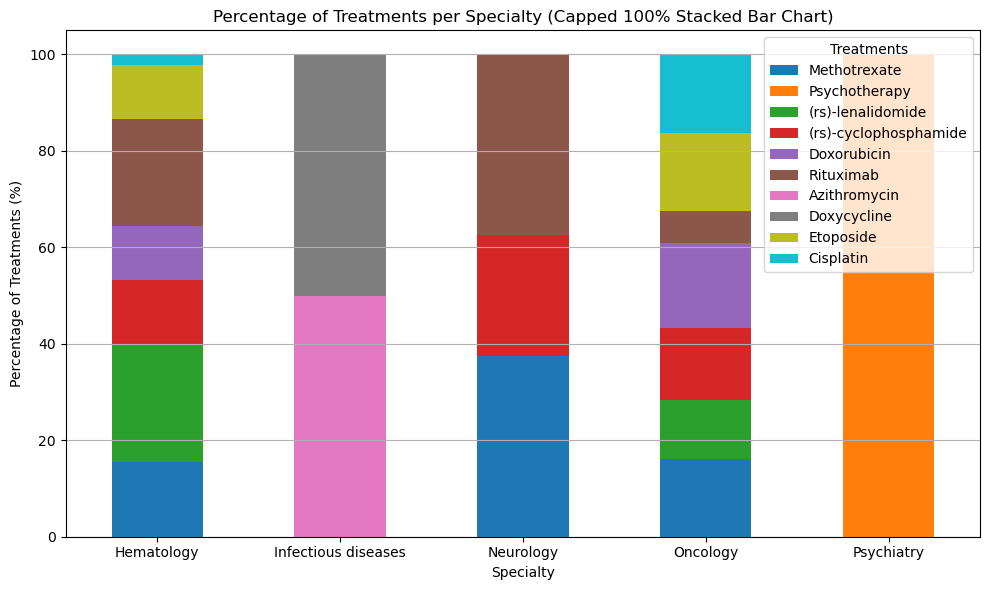

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import json
# Updated sample dataset
data = json.load(open('data/data.json'))

# Convert data to DataFrame
rows = []
for disease, details in data.items():
    if 'Treatments List' not in details or 'Specialty' not in details:
        continue
    for treatment in details['Treatments List']:
        for specialty in details['Specialty']:
            rows.append({'Disease': disease, 'Treatment': treatment, 'Specialty': specialty})

df = pd.DataFrame(rows)

# Count treatments per specialty and treatment
treatment_counts = df.groupby(['Specialty', 'Treatment']).size().unstack(fill_value=0)

# Cap the number of specialties and treatments
max_specialties = 5  # Change this value to cap the number of specialties
max_treatments = 10   # Change this value to cap the number of treatments

# Get top specialties based on treatment counts
top_specialties = treatment_counts.sum(axis=1).nlargest(max_specialties).index
# Check if any specialties exist in the treatment_counts DataFrame
valid_specialties = treatment_counts.index.intersection(top_specialties)

# Get top treatments for valid specialties
top_treatments = treatment_counts.loc[valid_specialties].sum(axis=0).nlargest(max_treatments).index

# Filter the treatment counts DataFrame to include only valid specialties and treatments
treatment_counts_capped = treatment_counts.loc[valid_specialties, top_treatments]

# Normalize the counts to get percentages for a 100% stacked bar chart
if not treatment_counts_capped.empty:
    treatment_counts_percentage = treatment_counts_capped.div(treatment_counts_capped.sum(axis=1), axis=0) * 100

    # Create 100% stacked bar chart
    treatment_counts_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab10')
    plt.title('Percentage of Treatments per Specialty (Capped 100% Stacked Bar Chart)')
    plt.xlabel('Specialty')
    plt.ylabel('Percentage of Treatments (%)')
    plt.xticks(rotation=360)
    plt.grid(axis='y')
    plt.legend(title='Treatments')
    plt.tight_layout()
    plt.show()
else:
    print("No valid specialties or treatments available for plotting.")
